In [8]:
import os
import math
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from lib.myfunc import FractalParser


experimental_results


,trial_count,LF/HF(rest_before),LF/HF(task),LF/HF(rest_after),answer(q1),answer(q2),answer(q3),answer(q4),answer(q5),answer(q6),image_name
0,1,1.665330,1.265538,1.587807,2,3,4,2,2,2,20191211_185222038_iOS.jpg
1,2,1.934818,1.429750,1.589041,5,5,5,5,5,4,20191211_185224526_iOS.jpg
2,3,1.242612,1.582760,1.615331,3,3,2,3,3,2,20191211_185226484_iOS.jpg
3,4,1.587081,1.201165,1.746261,5,3,2,5,5,4,20191211_185228458_iOS.jpg
4,5,1.341981,1.603083,1.460804,2,2,2,2,4,2,20191211_185230473_iOS.jpg
5,6,1.559287,1.351508,1.653283,5,5,3,5,5,3,20191211_185232325_iOS.jpg
6,7,1.530212,1.544244,1.733925,4,4,3,4,5,2,20191211_185234142_iOS.jpg
7,8,1.657821,1.384116,1.598215,5,5,4,4,4,4,20191211_185236059_iOS.jpg
8,9,1.474301,1.633734,1.466571,3,2,3,3,3,2,20191211_185237826_iOS.jpg
9,10,1.321811,1.930170,1.400278,4,3,4,4,3,3,20191211_185239544_iOS.jpg



questionnaire_details


,id,content
0,q1,豊かでない- 豊かである
1,q2,ポジティブでない - ポジティブである
2,q3,暗い - 明るい
3,q4,弱々しい - 力強い
4,q5,平凡な - 独創的な
5,q6,理性的な - 感情的な



images


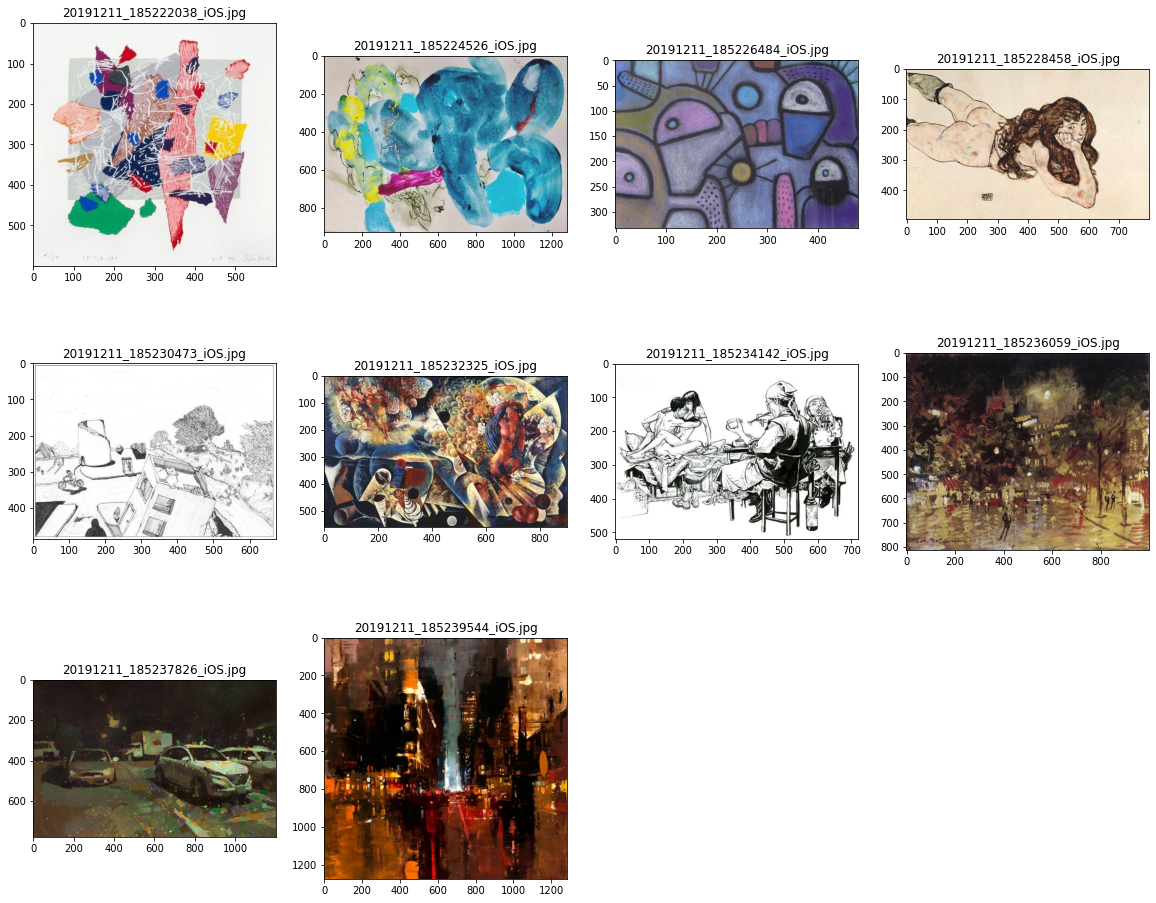

In [9]:
experimental_results_file = "../experimental_data/experimental_results.csv"
questionnaire_details_file = "../experimental_data/questionnaire_details.csv"
image_dir = "../experimental_data/images"

experimental_results = pd.read_csv(experimental_results_file, index_col=0)
print("\nexperimental_results")
display(experimental_results)

questionnaire_details = pd.read_csv(questionnaire_details_file, index_col=0)
print("\nquestionnaire_details")
display(questionnaire_details)

image_names = experimental_results["image_name"]
print("\nimages")
plt.figure(figsize=(20, 16))
num_columns = 4
num_rows = math.ceil(len(image_names)/num_columns)
for i, image_name in enumerate(image_names):
    image_file = os.path.join(image_dir, image_name)
    plt.subplot(num_rows, num_columns, i+1)
    plt.title(image_name)
    plt.imshow(plt.imread(image_file))
plt.show()

<h2>Correlation(Relationship) between Answer of Questionnaire and Value of LF/HF</h2>
<p>- Because of the lack of data, just plot data at this time.</p>
<p>- For each questionnaire, ilustrate(plot) the relationship between questionnaire answer and LFHF value.</p>

In [10]:
LFHFs_task = experimental_results["LF/HF(task)"]
LFHFs_rest_before = experimental_results["LF/HF(rest_before)"]
LFHFs_diff = LFHFs_task - LFHFs_rest_before

Questionnaire 1
correlation_coefficient -> -0.40622935047124614


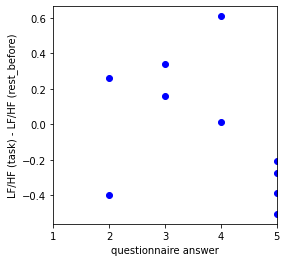

Questionnaire 2
correlation_coefficient -> -0.5535691179967643


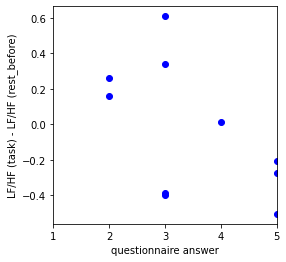

Questionnaire 3
correlation_coefficient -> -0.3506026686839339


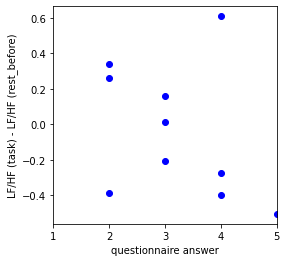

Questionnaire 4
correlation_coefficient -> -0.37021540785267704


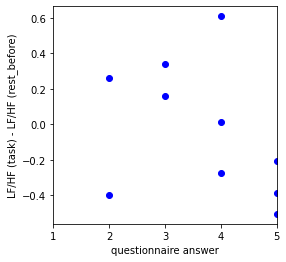

Questionnaire 5
correlation_coefficient -> -0.38851200851823364


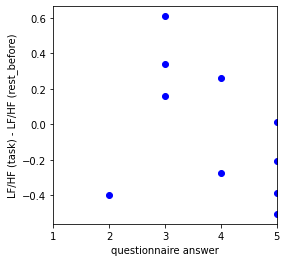

Questionnaire 6
correlation_coefficient -> -0.5255295001529559


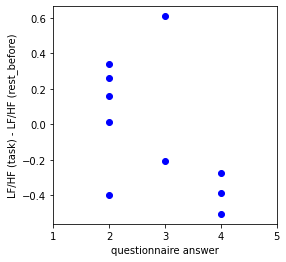

In [19]:
answer_column_name_dict = {
    "Questionnaire 1": "answer(q1)",
    "Questionnaire 2": "answer(q2)",
    "Questionnaire 3": "answer(q3)",
    "Questionnaire 4": "answer(q4)",
    "Questionnaire 5": "answer(q5)",
    "Questionnaire 6": "answer(q6)"
}
for display_name, answer_column_name in answer_column_name_dict.items():
    print(display_name)
    answers = experimental_results[answer_column_name]
    correlation_coefficient = np.corrcoef(answers, LFHFs_diff)[0][1]
    print("correlation_coefficient -> {}".format(correlation_coefficient))
    fig = plt.figure(figsize=(10, 4))
    plt.subplots_adjust(wspace = 0.5)
#     ax1 = fig.add_subplot(1, 2, 1)
#     ax1.plot(answers, LFHFs_task, 'o', color="blue")
#     ax1.set_xlabel("questionnaire answer")
#     ax1.set_ylabel("LF/HF (task)")
#     ax1.set_xlim(1, 5)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(answers, LFHFs_diff, 'o', color="blue")
    ax2.set_xlabel("questionnaire answer")
    ax2.set_ylabel("LF/HF (task) - LF/HF (rest_before)")
    ax2.set_xlim(1, 5)
    plt.show()

<h2>Calculate Fractal DImension using "Box Counting"<h2>

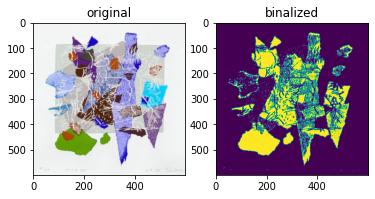

fractal_dimension -> 1.684637861373248



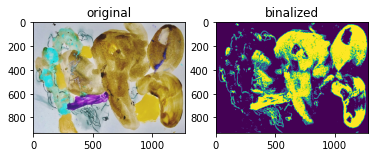

fractal_dimension -> 1.7397796875496994



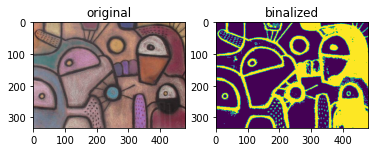

fractal_dimension -> 1.7341562645061477



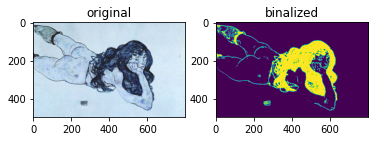

fractal_dimension -> 1.5812988539235155



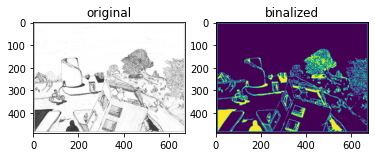

fractal_dimension -> 1.598688519572242



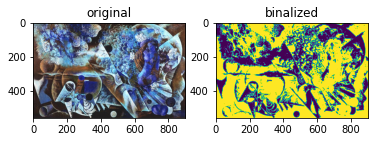

fractal_dimension -> 1.917260235066485



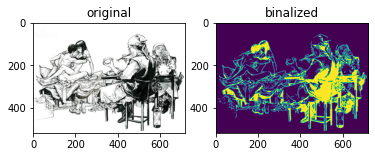

fractal_dimension -> 1.75284081142362



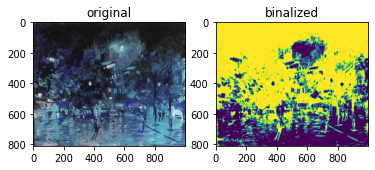

fractal_dimension -> 1.898791979828508



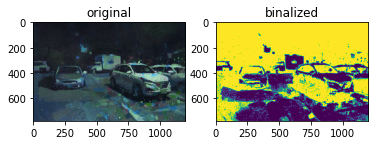

fractal_dimension -> 1.9004076618017742



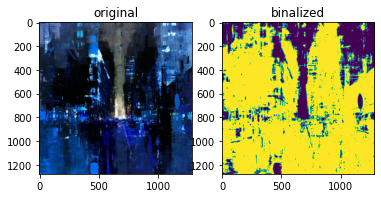

fractal_dimension -> 1.925707508829808



,image_name,fractal_dimension
0,20191211_185222038_iOS.jpg,1.684638
1,20191211_185224526_iOS.jpg,1.739780
2,20191211_185226484_iOS.jpg,1.734156
3,20191211_185228458_iOS.jpg,1.581299
4,20191211_185230473_iOS.jpg,1.598689
5,20191211_185232325_iOS.jpg,1.917260
6,20191211_185234142_iOS.jpg,1.752841
7,20191211_185236059_iOS.jpg,1.898792
8,20191211_185237826_iOS.jpg,1.900408
9,20191211_185239544_iOS.jpg,1.925708


In [20]:
fractal_parser = FractalParser()
fractal_dimensions = []
for i, image_name in enumerate(image_names):
    image_file = os.path.join(image_dir, image_name)
    fractal_dimension = fractal_parser.get_fractal_dimension(
        image_file = image_file,
        max_box_size = 100,
        min_box_size = 5,
        show_figures = True
    )
    fractal_dimensions.append([image_name, fractal_dimension])
    print("fractal_dimension -> {}\n".format(fractal_dimension))
columns = ["image_name", "fractal_dimension"]
fractal_dimensions = pd.DataFrame(fractal_dimensions, columns=columns)
display(fractal_dimensions)

In [21]:
LFHF_fractal = pd.merge(experimental_results, fractal_dimensions, on="image_name")
display(LFHF_fractal)

,trial_count,LF/HF(rest_before),LF/HF(task),LF/HF(rest_after),answer(q1),answer(q2),answer(q3),answer(q4),answer(q5),answer(q6),image_name,fractal_dimension
0,1,1.665330,1.265538,1.587807,2,3,4,2,2,2,20191211_185222038_iOS.jpg,1.684638
1,2,1.934818,1.429750,1.589041,5,5,5,5,5,4,20191211_185224526_iOS.jpg,1.739780
2,3,1.242612,1.582760,1.615331,3,3,2,3,3,2,20191211_185226484_iOS.jpg,1.734156
3,4,1.587081,1.201165,1.746261,5,3,2,5,5,4,20191211_185228458_iOS.jpg,1.581299
4,5,1.341981,1.603083,1.460804,2,2,2,2,4,2,20191211_185230473_iOS.jpg,1.598689
5,6,1.559287,1.351508,1.653283,5,5,3,5,5,3,20191211_185232325_iOS.jpg,1.917260
6,7,1.530212,1.544244,1.733925,4,4,3,4,5,2,20191211_185234142_iOS.jpg,1.752841
7,8,1.657821,1.384116,1.598215,5,5,4,4,4,4,20191211_185236059_iOS.jpg,1.898792
8,9,1.474301,1.633734,1.466571,3,2,3,3,3,2,20191211_185237826_iOS.jpg,1.900408
9,10,1.321811,1.930170,1.400278,4,3,4,4,3,3,20191211_185239544_iOS.jpg,1.925708


<h3>Check whether calculated value and theoretical value match</h3>

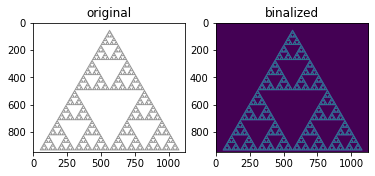

fractal_dimension
calculated value -> 1.536276681876783
theoretical_value -> 1.585


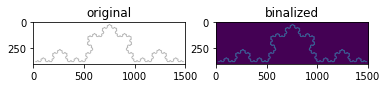

fractal_dimension
calculated value -> 1.2790373627644305
theoretical_value -> 1.2619


In [37]:
validation_data_list = [
    {
        "image_file": "./lib/sierpinski.png",
        "theoretical_value": 1.5850
    }, 
    {
        "image_file": "./lib/koch.png",
        "theoretical_value": 1.2619
    }
]
for validation_data in validation_data_list:
    image_file = validation_data["image_file"]
    fractal_dimension = fractal_parser.get_fractal_dimension(
        image_file = image_file,
        max_box_size = 100,
        min_box_size = 5,
        show_figures = True
    )
    print("fractal_dimension\ncalculated value -> {}\ntheoretical_value -> {}".format(fractal_dimension, validation_data["theoretical_value"]))